<a href="https://colab.research.google.com/github/md-tuhin-hasnat/news_paper_genre_classification_using_lstm/blob/main/news_ganre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#@title ignoring all unneccessary warnings

import warnings
warnings.filterwarnings('ignore')

In [62]:
#@title fucntion for downloading dataset as dataframe

import kagglehub
from kagglehub import KaggleDatasetAdapter
def download_kaggle_dataset_as_dataframe(dataset_path,csv_file_path):
  df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset_path,
    csv_file_path,
  )
  return df

In [63]:
#@title downloading test and train data

dataset_source = "firearc7/ag-news-classification"
train_csv = "train.csv"
test_csv = "test.csv"
train_df = download_kaggle_dataset_as_dataframe(dataset_source,train_csv)
test_df = download_kaggle_dataset_as_dataframe(dataset_source,test_csv)

In [64]:
#@title train dataset

train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [65]:
#@title test dataset

test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [66]:
#@title checking null values on train dataframe

train_df.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [67]:
#@title checking null values on test dataframe

test_df.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [68]:
#@title checking duplicate values on test data

test_df.duplicated().sum()

np.int64(0)

In [69]:
#@title checking duplicate values on train data

train_df.duplicated().sum()

np.int64(0)

In [70]:
#@title columns of the dataset

train_df.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [71]:
#@title fucntion for splitting the dataset into features and outcomes

def feature_outcome_split(df,feature_column,outcome_column):
  X = df[feature_column]
  y = df[outcome_column]
  return X,y

In [72]:
#@title defining feature outcome columns

feature_column = ['Title', 'Description']
outcome_column = 'Class Index'

In [73]:
#@title splitting train data

X_train,y_train = feature_outcome_split(train_df,feature_column,outcome_column)

In [74]:
#@title splitting test data

X_test, y_test = feature_outcome_split(test_df,feature_column,outcome_column)

In [75]:
#@title shape after `feature outcome split`

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (120000, 2)
y_train shape : (120000,)
X_test shape : (7600, 2)
y_test shape : (7600,)


In [76]:
#@title function for checking data balanching

import seaborn as sns
import matplotlib.pyplot as plt
def check_balance(y):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

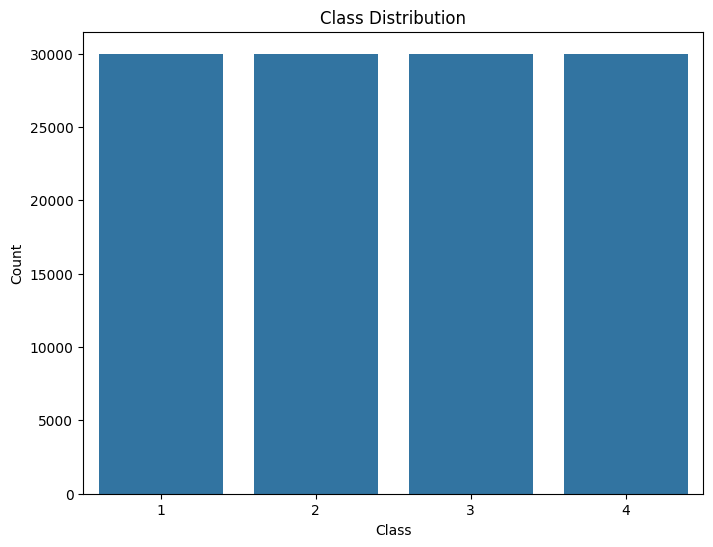

In [77]:
#@title checking data balancing for train data

check_balance(y_train)

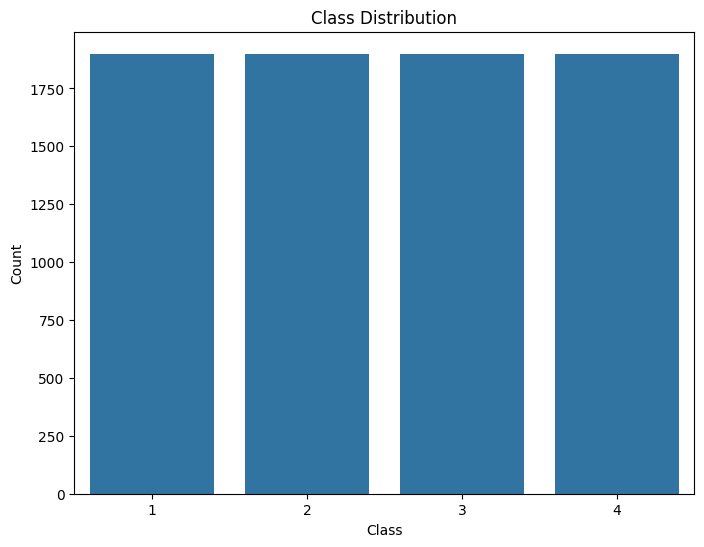

In [78]:
#@title checking data balancing for train data

check_balance(y_test)

In [79]:
#@title function for tokenize a column

from tensorflow.keras.preprocessing.text import Tokenizer
def tokens_from_column(column):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(column)
  return tokenizer

In [80]:
#@title tokens from `X_train['Descriptin']`
tokens_description = tokens_from_column(X_train['Description'])

tokens_description.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

In [81]:
#@title tokens from `X_train['Title']`
tokens_title = tokens_from_column(X_train['Title'])

tokens_title.word_index

{'to': 1,
 'in': 2,
 '39': 3,
 'for': 4,
 'on': 5,
 'of': 6,
 's': 7,
 'ap': 8,
 'the': 9,
 'b': 10,
 'gt': 11,
 'lt': 12,
 'a': 13,
 'reuters': 14,
 'at': 15,
 'us': 16,
 'with': 17,
 'new': 18,
 'as': 19,
 'up': 20,
 'and': 21,
 'oil': 22,
 'says': 23,
 'over': 24,
 'microsoft': 25,
 'u': 26,
 'iraq': 27,
 'by': 28,
 'is': 29,
 '1': 30,
 'from': 31,
 'after': 32,
 'afp': 33,
 'out': 34,
 'no': 35,
 '2': 36,
 'deal': 37,
 'china': 38,
 'stocks': 39,
 'more': 40,
 'profit': 41,
 'may': 42,
 'be': 43,
 'win': 44,
 'update': 45,
 'not': 46,
 'talks': 47,
 'bush': 48,
 'game': 49,
 'wins': 50,
 'it': 51,
 'world': 52,
 'back': 53,
 'first': 54,
 '3': 55,
 'sales': 56,
 'report': 57,
 'prices': 58,
 'off': 59,
 'ibm': 60,
 'security': 61,
 'will': 62,
 'open': 63,
 'down': 64,
 'eu': 65,
 't': 66,
 'google': 67,
 'into': 68,
 'two': 69,
 'com': 70,
 'against': 71,
 'set': 72,
 'top': 73,
 'un': 74,
 'gets': 75,
 'japan': 76,
 'india': 77,
 'court': 78,
 'record': 79,
 'bid': 80,
 'rise': 8

In [82]:
#@title total tokens of title and description columns

total_tokens_title = len(tokens_title.word_index)
total_tokens_description = len(tokens_description.word_index)

print("Total tokens in 'Title' column:", total_tokens_title)
print("Total tokens in 'Description' column:", total_tokens_description)

Total tokens in 'Title' column: 36752
Total tokens in 'Description' column: 63731


In [83]:
#@title function for tokenize a column

def tokenized_column(tokenizer,column):
  tokenized_column = tokenizer.texts_to_sequences(column)
  return tokenized_column

In [84]:
#@title tokenize `X_train['Description']`

tokenized_description_train = tokenized_column(tokens_description,X_train['Description'])

In [85]:
#@title tokenize `X_train['Title']`

tokenized_title_train = tokenized_column(tokens_title,X_train['Title'])

In [86]:
#@title tokenize `X_test['Description']`

tokenized_description_test = tokenized_column(tokens_description,X_test['Description'])

In [87]:
#@title tokenize `X_test['Title']`

tokenized_title_test = tokenized_column(tokens_title,X_test['Title'])

In [94]:
#@title function for making padded sequences from the tokenized columns
from tensorflow.keras.preprocessing.sequence import pad_sequences
def padded_sequences(tokenized_column,max_len):
  padded_sequences = pad_sequences(tokenized_column, padding='pre', maxlen=max_len)
  return padded_sequences

In [95]:
#@title max length of tokenized description and tokenized title
max_len_description = max([len(x) for x in tokenized_description_train])
max_len_title = max([len(x) for x in tokenized_title_train])

print("Max length of tokenized description:", max_len_description)
print("Max length of tokenized title:", max_len_title)

Max length of tokenized description: 173
Max length of tokenized title: 24


In [96]:
#@title padded sequence from `tokenized_description_train`

padded_description_train = padded_sequences(tokenized_description_train,max_len_description)

In [97]:
#@title padded sequence from `tokenized_title_train`

padded_title_train = padded_sequences(tokenized_title_train,max_len_title)

In [98]:
#@title padded sequence from `tokenized_description_test`

padded_description_test = padded_sequences(tokenized_description_test, max_len_description)

In [99]:
#@title padded sequence from `tokenized_title_test`

padded_title_test = padded_sequences(tokenized_title_test, max_len_title)

In [100]:
#@title shape of all padded sequences

print("Shape of padded_description_train:", padded_description_train.shape)
print("Shape of padded_title_train:", padded_title_train.shape)
print("Shape of padded_description_test:", padded_description_test.shape)
print("Shape of padded_title_test:", padded_title_test.shape)


Shape of padded_description_train: (120000, 173)
Shape of padded_title_train: (120000, 24)
Shape of padded_description_test: (7600, 173)
Shape of padded_title_test: (7600, 24)


In [119]:
#@title function for model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def build_model(total_tokens, input_length, num_classes):
  model = Sequential()
  model.add(Embedding(total_tokens, 100, input_length=input_length))
  model.add(LSTM(150, return_sequences=True))
  model.add(LSTM(150))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [120]:

from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train-1, num_classes=num_classes)
y_test_encoded = to_categorical(y_test-1, num_classes=num_classes)

In [121]:
#@title model building for description column

model_description = build_model(total_tokens_description, max_len_description, num_classes)

model_description.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
#@title model building for title column

model_title = build_model(total_tokens_title, max_len_title, num_classes)

model_title.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [124]:
#@title trainig on model_description

model_description.fit(padded_description_train, y_train_encoded, epochs=10)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.9170 - loss: 0.2551
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9457 - loss: 0.1690
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9626 - loss: 0.1128
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9745 - loss: 0.0737
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.9837 - loss: 0.0460
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9892 - loss: 0.0305
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9916 - loss: 0.0227
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9935 - loss: 0.0175
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.9947 - loss: 0.0140
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9952 - loss: 0.0120


In [143]:
#@title trainig on model_title

model_title.fit(padded_title_train, y_train_encoded, epochs=10)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7597 - loss: 0.6077
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9097 - loss: 0.2656
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9328 - loss: 0.1949
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.9494 - loss: 0.1441
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9626 - loss: 0.1030
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9697 - loss: 0.0807
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9771 - loss: 0.0617
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9810 - loss: 0.0487
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9833 - loss: 0.0405
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9864 - loss: 0.0332


In [138]:
to_predict = padded_description_test

pos = model_description.predict(to_predict)
predicted_classes_indices = np.argmax(pos, axis=1) + 1
actual_classes_indices = np.argmax(y_test_encoded, axis=1) + 1

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [144]:
to_predict = padded_title_test

pos_title = model_title.predict(to_predict)
predicted_classes_indices_title = np.argmax(pos_title, axis=1) + 1
actual_classes_indices_title = np.argmax(y_test_encoded, axis=1) + 1

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

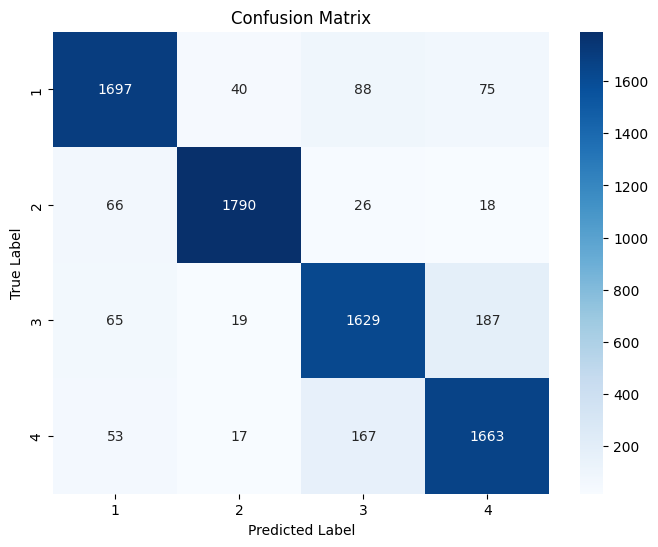

In [140]:
make_confusion_matrix(actual_classes_indices, predicted_classes_indices, [1, 2, 3, 4])

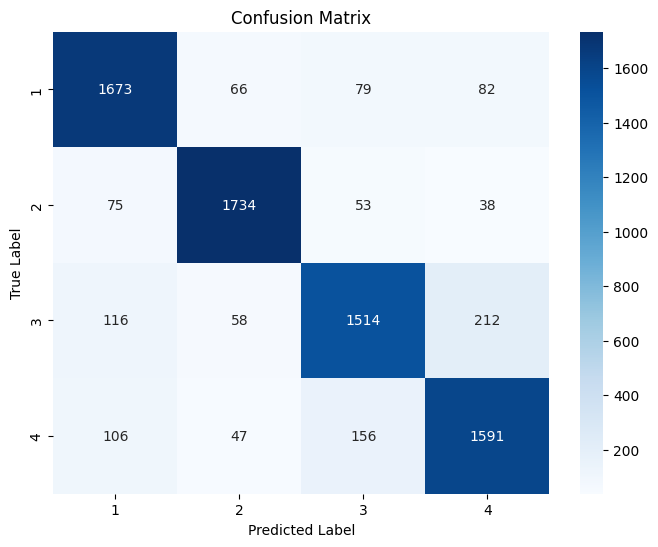

In [145]:
make_confusion_matrix(actual_classes_indices_title, predicted_classes_indices_title, [1, 2, 3, 4])

In [141]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def make_roc_curve(y_true_encoded, y_pred_probabilities, class_labels):
    plt.figure(figsize=(10, 8))
    for i in range(y_true_encoded.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_encoded[:, i], y_pred_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

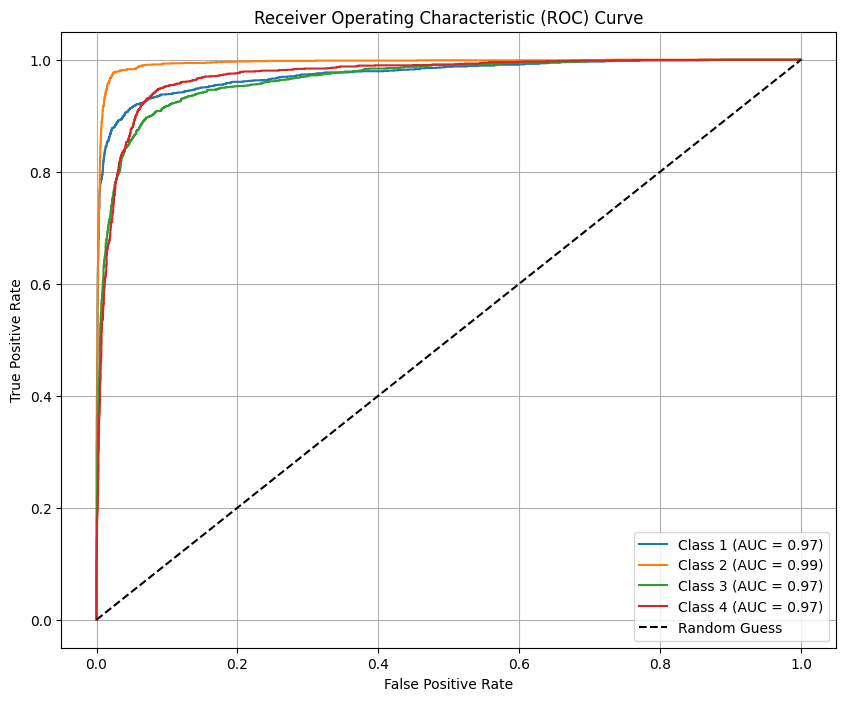

In [142]:
make_roc_curve(y_test_encoded, pos, [1, 2, 3, 4])

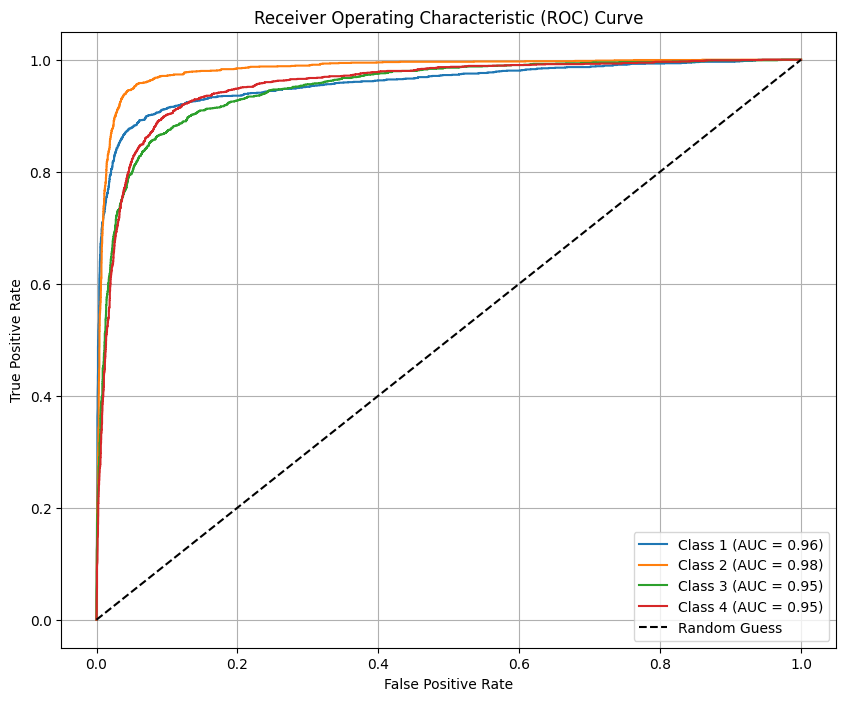

In [146]:
make_roc_curve(y_test_encoded, pos_title, [1, 2, 3, 4])